In [9]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from sklearn import  metrics as skm

In [11]:
scaled_test_features= pd.read_csv('scaled_features_test_data_ds.csv')
true_labels_ts= pd.read_csv('true_labels_test_data.csv')
features_ts_df= pd.read_csv('features_test_data.csv')

In [12]:
NS = tf.keras.models.load_model('Models Projeto B/NS_ds')
NG = tf.keras.models.load_model('Models Projeto B/NG_ds')
MG = tf.keras.models.load_model('Models Projeto B/MG_ds')
MS = tf.keras.models.load_model('Models Projeto B/MS_ds')

In [13]:
def model_metrics(y_true, y_pred, name, y_prob= (), prints= False, accuracy= False,
                  precision= False, f1= False, hamming_loss= False,
                  cohen_kappa= False, matthews_corr= False):
    '''Description: This function calculates the evaluation metrics of a machine learning model given the true labels (y_true) and predicted labels (y_pred). The function allows the user to specify which evaluation metrics to calculate and whether to print the results or not. The function returns a list of evaluation metrics, including accuracy, precision, F1 score, Hamming loss, Cohen's kappa score, Matthews correlation coefficient, and the name of the model.

    Parameters:
        y_true: array-like, true labels of the data
        y_pred: array-like, predicted labels of the data
        name: str, name of the machine learning model
        y_prob: array-like, optional, default (), predicted probabilities of the data (only required for some evaluation metrics)
        prints: bool, optional, default False, whether to print the evaluation metrics or not
        accuracy: bool, optional, default False, whether to calculate accuracy or not
        precision: bool, optional, default False, whether to calculate precision or not
        f1: bool, optional, default False, whether to calculate F1 score or not
        hamming_loss: bool, optional, default False, whether to calculate Hamming loss or not
        cohen_kappa: bool, optional, default False, whether to calculate Cohen's kappa score or not
        matthews_corr: bool, optional, default False, whether to calculate Matthews correlation coefficient or not
    Returns: a list of evaluation metrics including accuracy, precision, F1 score, Hamming loss, Cohen's kappa score, Matthews correlation coefficient, and the name of the model.
    '''
    if accuracy:
        acc= skm.accuracy_score(y_true, y_pred)
    else:
        acc= 0
    if precision:
        prec= skm.precision_score(y_true, y_pred, average= 'weighted')
    else:
        prec= 0
    if f1:
        f1score= skm.f1_score(y_true, y_pred, average= 'weighted')
    else:
        f1score= 0
    if hamming_loss:
        h_loss= skm.hamming_loss(y_true, y_pred)
    else:
        h_loss= 0
    if cohen_kappa:
        ckappa= skm.cohen_kappa_score(y_true, y_pred)
    else:
        ckappa= 0
    if matthews_corr:
        mcc= skm.matthews_corrcoef(y_true, y_pred)
    else:
        mcc= 0
    if prints:
        if accuracy:
            print('The accuracy score is:', round(acc, 4))
        if precision:
            print('The precision score is:', round(prec, 4))
        if f1:
            print('The F1 score is:', round(f1score, 4))
        if hamming_loss:
            print('The Hamming loss is:', round(h_loss, 4))
        if cohen_kappa:
            print('Cohens kappa score is:', round(ckappa, 4))
        if matthews_corr:
            print('Matthews Correlation Coefficient:', round(mcc, 4))
    return [acc, prec, f1score, h_loss, ckappa, mcc, name]

In [14]:
activity_id_dict= {0:4, 1:5, 2:6, 3:7, 4:24}

838/838 [==============================] - 2s 2ms/step
The accuracy score is: 0.9662
The precision score is: 0.9663
The F1 score is: 0.9662
The Hamming loss is: 0.0338
Cohens kappa score is: 0.9554
Matthews Correlation Coefficient: 0.9555


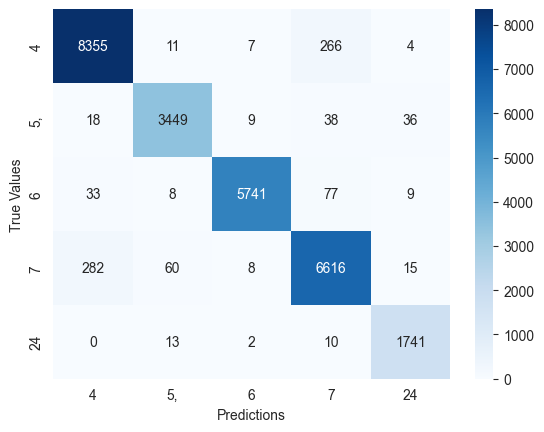

In [15]:
NS_predicts= NS.predict(features_ts_df)
NS_predicts = np.argmax(NS_predicts, axis=1)
NS_predicts= pd.DataFrame(NS_predicts)[0].replace(activity_id_dict)
#NS_prob= NS.predict_proba(features_ts_df)
ns_cnf_mat= skm.confusion_matrix(true_labels_ts, NS_predicts)

#plt.figure(figsize= (10,10))
categories= ['4', '5,', '6', '7', '24']
sns.heatmap(ns_cnf_mat, annot= True, fmt='g', cmap= 'Blues',
            xticklabels= categories, yticklabels= categories)
plt.ylabel('True Values');
plt.xlabel('Predictions');
NS_metrics= model_metrics(true_labels_ts, NS_predicts, 'NS', prints= True, accuracy= True,
                          precision= True, f1= True, hamming_loss= True, cohen_kappa= True,
                          matthews_corr= True)

838/838 [==============================] - 2s 3ms/step
The accuracy score is: 0.9709
The precision score is: 0.9721
The F1 score is: 0.971
The Hamming loss is: 0.0291
Cohens kappa score is: 0.9616
Matthews Correlation Coefficient: 0.9621


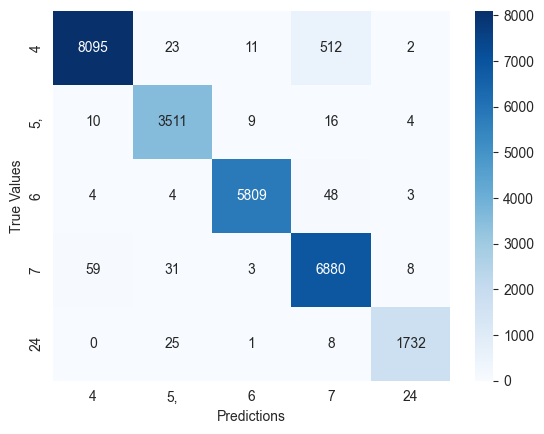

In [16]:
NG_predicts= NG.predict(features_ts_df)
NG_predicts = np.argmax(NG_predicts, axis=1)
NG_predicts= pd.DataFrame(NG_predicts)[0].replace(activity_id_dict)

ng_cnf_mat= skm.confusion_matrix(true_labels_ts, NG_predicts)

#plt.figure(figsize= (10,10))
sns.heatmap(ng_cnf_mat, annot= True, fmt='g', cmap= 'Blues',
            xticklabels= categories, yticklabels= categories)
plt.ylabel('True Values');
plt.xlabel('Predictions');
NG_metrics= model_metrics(true_labels_ts, NG_predicts, 'NG', prints= True, accuracy= True,
                          precision= True, f1= True, hamming_loss= True, cohen_kappa= True,
                          matthews_corr= True)

838/838 [==============================] - 2s 3ms/step
The accuracy score is: 0.9809
The precision score is: 0.9815
The F1 score is: 0.981
The Hamming loss is: 0.0191
Cohens kappa score is: 0.9748
Matthews Correlation Coefficient: 0.9749


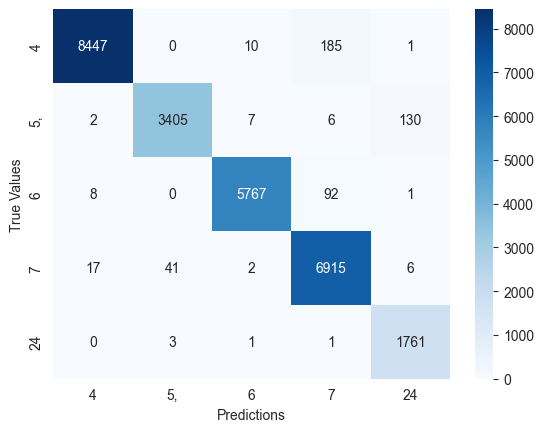

In [17]:
MG_predicts= MG.predict(scaled_test_features)
MG_predicts = np.argmax(MG_predicts, axis=1)
MG_predicts= pd.DataFrame(MG_predicts)[0].replace(activity_id_dict)

mg_cnf_mat= skm.confusion_matrix(true_labels_ts, MG_predicts)

#plt.figure(figsize= (10,10))
sns.heatmap(mg_cnf_mat, annot= True, fmt='g', cmap= 'Blues',
            xticklabels= categories, yticklabels= categories)
plt.ylabel('True Values');
plt.xlabel('Predictions');
MG_metrics= model_metrics(true_labels_ts, MG_predicts, 'MG', prints= True, accuracy= True,
                          precision= True, f1= True, hamming_loss= True, cohen_kappa= True,
                           matthews_corr= True)

838/838 [==============================] - 2s 2ms/step
The accuracy score is: 0.8816
The precision score is: 0.8894
The F1 score is: 0.8814
The Hamming loss is: 0.1184
Cohens kappa score is: 0.8445
Matthews Correlation Coefficient: 0.8464


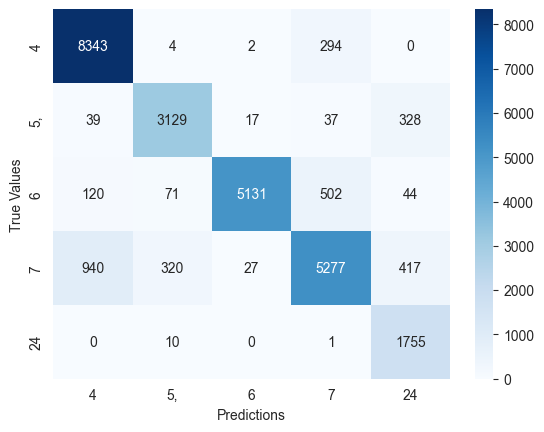

In [18]:
MS_predicts= MS.predict(scaled_test_features)
MS_predicts = np.argmax(MS_predicts, axis=1)
MS_predicts= pd.DataFrame(MS_predicts)[0].replace(activity_id_dict)

ms_cnf_mat= skm.confusion_matrix(true_labels_ts, MS_predicts)

#plt.figure(figsize= (10,10))
sns.heatmap(ms_cnf_mat, annot= True, fmt='g', cmap= 'Blues',
            xticklabels= categories, yticklabels= categories)
plt.ylabel('True Values');
plt.xlabel('Predictions');
MS_metrics= model_metrics(true_labels_ts, MS_predicts, 'MS', prints= True, accuracy= True,
                          precision= True, f1= True, hamming_loss= True, cohen_kappa= True,
                          matthews_corr= True)

In [16]:
metrics= np.array([NS_metrics,NG_metrics, MG_metrics, MS_metrics])
metric_df= pd.DataFrame(data= metrics, columns= ['Accuracy', 'Precision', 'F1 Score', 'Hamming loss',
                                                 'Cohens Kappa', 'Matthews Correlation', 'Model Name']
                        ,index= ['NS', 'NG', 'MG', 'MS']).drop('Hamming loss', axis= 1)
hl= np.array([[NS_metrics[i] for i in [3,6]], [NG_metrics[i] for i in [3,6]],
             [MG_metrics[i] for i in [3,6]], [MS_metrics[i] for i in [3,6]]])
hl_df= pd.DataFrame(data= hl, columns= ['Hamming loss', 'Model Name'])

In [17]:
metrics_exp= pd.melt(frame = metric_df,
             id_vars = 'Model Name',
             var_name = 'Statistic',
             value_name = 'value')
metrics_exp= metrics_exp.astype({'value':'float'})
hl_exp= pd.melt(frame = hl_df,
             id_vars = 'Model Name',
             var_name = 'Statistic',
             value_name = 'value')
hl_exp= hl_exp.astype({'value':'float'})

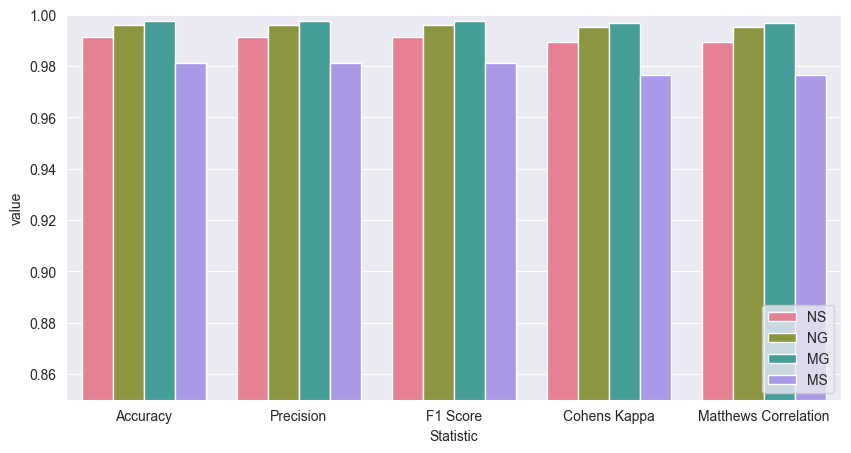

In [18]:
plt.figure(figsize= (10,5))
sns.barplot(data = metrics_exp, x = 'Statistic', y = 'value', hue = 'Model Name', palette= 'husl')
plt.ylim([0.85, 1]);
plt.legend(loc='lower right')

(0.0, 0.03)

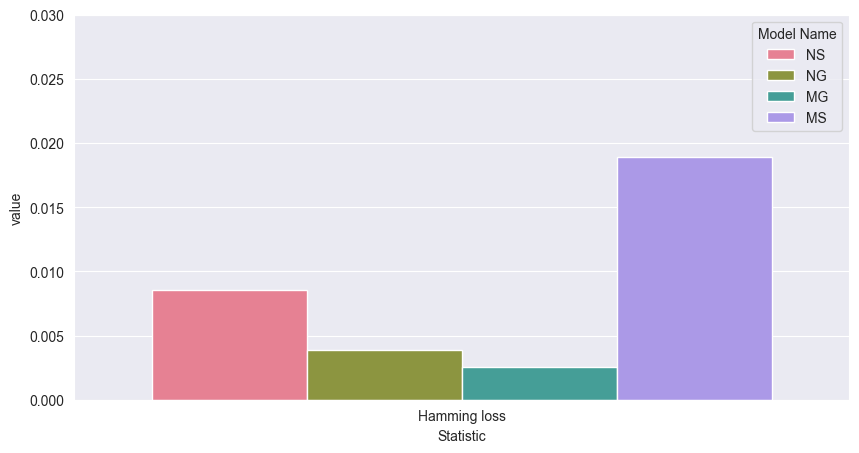

In [19]:
plt.figure(figsize= (10,5))
sns.barplot(data = hl_exp, x = 'Statistic', y = 'value', hue = 'Model Name', palette= 'husl')
plt.ylim([0, 0.03])